# Yale Hydropower Model

## Rocky River Powerplant

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime, calendar

plt.rcParams['figure.figsize'] = [10, 5] 
plt.rcParams['font.size'] = '14'

In [2]:
# Load data
stream_flow_data_path = './data/StreamFlowData.csv'
stream_flow_df = pd.read_csv(stream_flow_data_path)
stream_flow_df = stream_flow_df.drop(['Unnamed: 0', 'agency_cd', 'site_no', 'X_00060_00003_cd'], axis=1)
stream_flow_df = stream_flow_df.rename(columns={"Date":"Date", "X_00060_00003":"CFS"})
stream_flow_df['Date'] = pd.to_datetime(stream_flow_df['Date'], format='%m/%d/%Y')

# filter out 1993-2021
df_stream = stream_flow_df[(stream_flow_df['Date'] >= '1993-01-01') & (stream_flow_df['Date'] < '2023-01-01')]

In [3]:
CFS = list(df_stream['CFS'])
CFS = np.array(CFS)[np.isfinite(CFS)]

Dates = list(df_stream['Date'])

In [4]:
def find_minima(s):
    n = len(s)
    minima_loc = [0]
    for i in range(1, n - 1):
        if s[i] <= s[i - 1] and s[i] <= s[i + 1]:
            minima_loc.append(i)
    minima_loc.append(n-1)
    return np.array(minima_loc)

def interpolate_minima(s, minima):
    new_s = []
    for i in range(len(minima) - 1):
        diff = s[minima[i + 1]] - s[minima[i]]
        interval = diff / (minima[i + 1] - minima[i])
        for j in range(minima[i + 1] - minima[i]):
            new_s.append(s[minima[i]] + j * interval)
    new_s.append(s[-1])
    return np.array(new_s)

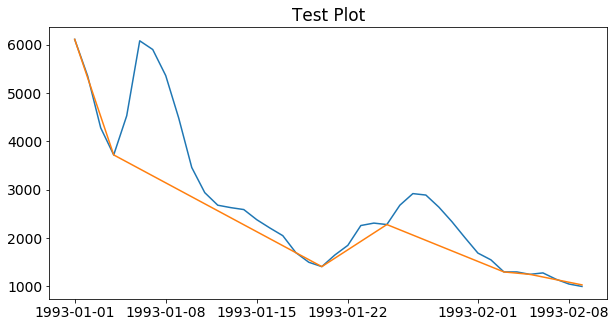

In [9]:
CFS_minima = find_minima(CFS)
baseline = interpolate_minima(CFS, CFS_minima)
rainfall = CFS - baseline

plt.plot(Dates[0:40], CFS[0:40])
plt.plot(Dates[0:40], baseline[0:40])
plt.title("Test Plot")
plt.show()

In [18]:
# Calculate yearly baseline and rainfall values by day + 95% error bars

baseline_by_day = [[baseline[i]] for i in range(365)]
baseline_by_day.append([0])

rainfall_by_day = [[rainfall[i]] for i in range(365)]
rainfall_by_day.append([0])

for i in range(len(baseline)):
    index = Dates[i].dayofyear - 1
    baseline_by_day[index].append(baseline[i])
    rainfall_by_day[index].append(rainfall[i])

yearly_baseline = np.array([(np.mean(i), 1.96 * np.std(i) / len(i)) for i in baseline_by_day])
yearly_rainfall = np.array([(np.mean(i), 1.96 * np.std(i) / len(i)) for i in rainfall_by_day])

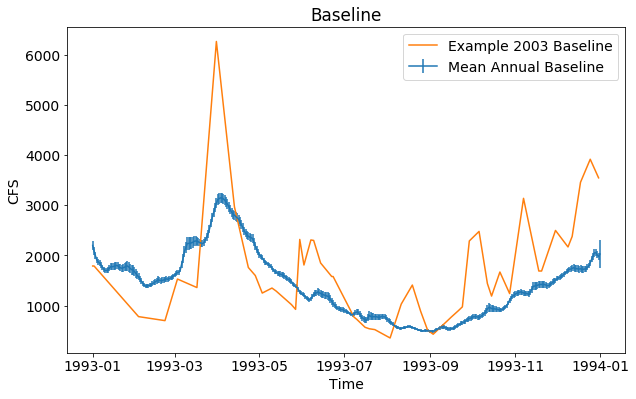

In [44]:
# Plot baseline data

plt.rcParams['figure.figsize'] = [10, 6] 
plt.errorbar(Dates[0:366], yearly_baseline[:,0], yerr = yearly_baseline[:,1], label = 'Mean Annual Baseline')
plt.plot(Dates[0:365], baseline[365*10: 365*11], label = 'Example 2003 Baseline')
plt.legend()
plt.xlabel('Time')
plt.ylabel('CFS')
plt.title('Baseline')
plt.show()

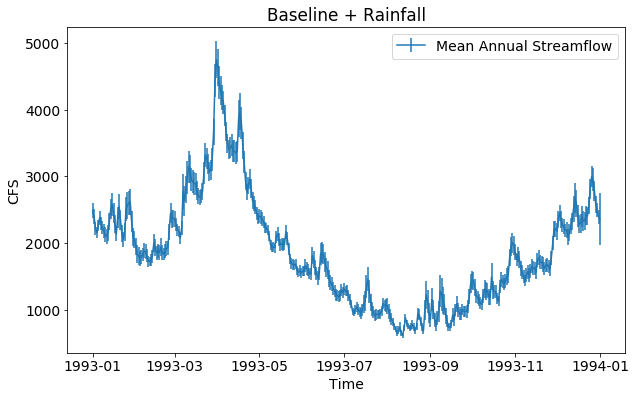

In [46]:
# Plot total streamflow data

plt.rcParams['figure.figsize'] = [10, 6] 
plt.errorbar(Dates[0:366], yearly_baseline[:,0] + yearly_rainfall[:,0],
             yerr = yearly_baseline[:,1] + yearly_rainfall[:,1], label = 'Mean Annual Streamflow')
# plt.plot(Dates[0:365], CFS[365*10: 365*11], label = 'Example 2003 Streamflow')
plt.legend()
plt.xlabel('Time')
plt.ylabel('CFS')
plt.title('Baseline + Rainfall')
plt.show()

In [49]:
rainfall_by_year = [[0]]*30

for i in range(len(rainfall)):
    index = Dates[i].year - 1993
    

SyntaxError: unexpected EOF while parsing (<ipython-input-49-a70549d9ff31>, line 4)